In [84]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv("IEA Global EV Data 2024.csv")
df.dtypes

region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object

C:\Users\kenny\AppData\Local\Temp\ipykernel_11464\1276622457.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  world_2010 = sort_by_world[specification[0]][specification[1]][sort_by_world.year == 2010]
C:\Users\kenny\AppData\Local\Temp\ipykernel_11464\1276622457.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  world_2010 = sort_by_world[specification[0]][specification[1]][sort_by_world.year == 2010]
C:\Users\kenny\AppData\Local\Temp\ipykernel_11464\1276622457.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  world_2023 = sort_by_world[specification[0]][specification[1]][sort_by_world.year == 2023]
C:\Users\kenny\AppData\Local\Temp\ipykernel_11464\1276622457.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  world_2023 = sort_by_world[specification[0]][specification[1]][sort_by_world.year == 2023]


14375342.0


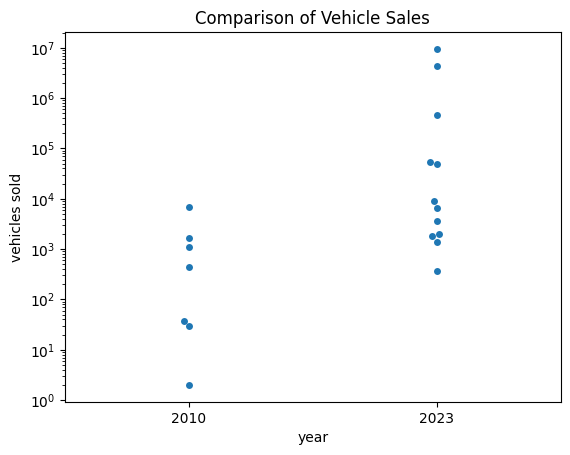

In [86]:
# 1. How many electric vehicles have been sold in the 
#    World in 2023 compared to 2010?
sort_by_world = df[df.region == "World"]
specification = [sort_by_world.category == "Historical", sort_by_world.parameter == "EV sales"]
world_2010 = sort_by_world[specification[0]][specification[1]][sort_by_world.year == 2010]
world_2023 = sort_by_world[specification[0]][specification[1]][sort_by_world.year == 2023]
sale_difference = world_2023.value.sum() - world_2010.value.sum()
print(sale_difference)
combined = pd.concat([world_2010, world_2023])
seaborn.swarmplot(x=combined.year,y=combined.value)
plt.yscale('log')
plt.ylabel("vehicles sold")
plt.title("Comparison of Vehicle Sales")
# make sure to save b4 showing otherwise saves blank img
plt.savefig("Visualizations/Question 1 Visualization.png")
plt.show()

C:\Users\kenny\AppData\Local\Temp\ipykernel_11464\2283563869.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sort_by_historical_sales = df[df.category == "Historical"][df.parameter == "EV sales"]


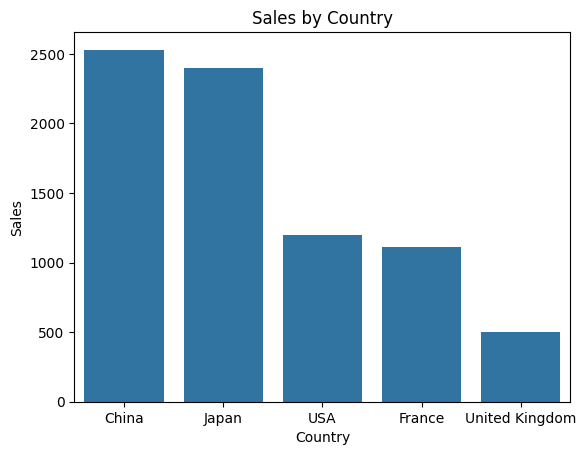

In [137]:
# 2. Who were the top 5 countries that sold EVs in 2010?
countries = df.region.unique()
sort_by_historical_sales = df[df.category == "Historical"][df.parameter == "EV sales"]
sort_by_historical_sales
historical_sales_2010 = sort_by_historical_sales[sort_by_historical_sales.year == 2010]
country_sales = {}
for country in countries:
    country_sales[country] = 0
for index, row in historical_sales_2010.iterrows():
    if (row.region != "World" and row.region != "Europe" and row.region != "EU27"):
        country_sales[row.region] = country_sales[row.region] + row.value
result = sorted(country_sales.items(), key=lambda item: item[1], reverse=True)
sum_country_sales = pd.DataFrame(result,columns=["Country","Sales"])
top_5_countries = sum_country_sales.nlargest(5,"Sales")
seaborn.barplot(x=top_5_countries.Country,y=top_5_countries.Sales)
plt.title("Sales by Country")
plt.savefig("Visualizations/Question 2 Visualization.png")
plt.show()

In [88]:
# 3. Who were the top 5 countries that sold EVs in 2023?

In [89]:
# 4. Which country has sold the most EVs in total?

In [90]:
# 5. How has the stock share changed in the US over time?

In [91]:
# 6. How has the stock share changed in the World over time?

In [92]:
# 7. What is the ratio of types of EVs in 2023?

In [93]:
# 8. How has the ratio of EV types changed over time?

In [94]:
# 9. What is the ratio of electric cars, trucks, etc. sold?

In [95]:
# 10. How have the percentage of electric vehicles sold in 
#     the United States changed over time?